In [1]:
import pandas as pd
from utils import load_data

# EDA for AAPL Historical Data

In [2]:
# Load the data
df = load_data('AAPL_historical_data.csv', base_dir='../data/yfinance_data')

# Summary statistics for all numeric columns
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()

# List columns with >5% nulls
threshold = 0.05 * len(df)
columns_with_many_nulls = missing_values[missing_values > threshold].index.tolist()

print("Summary Statistics:\n", summary_stats)
print("\nMissing Value Report:\n", missing_values)
print("\nColumns with >5% nulls:\n", columns_with_many_nulls)

Summary Statistics:
                Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10998.000000  10998.000000  
mean   3.180806e+08      0.000752      0.001546  
std    3.354523e+08      0.011753      0.083663  
min    0.000000e+00      0.000000      0.000000  
25%    1.132545e+

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on AAPL historical data.

In [3]:
import talib
# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the last few rows to show the new indicator columns
df[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail()

,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
10993,218.539993,224.228500,208.474199,48.687742,4.662717,6.678882,-2.016164
10994,217.490005,224.440500,209.098399,47.386437,3.748082,6.092722,-2.344640
10995,217.960007,224.633500,209.709000,48.055700,3.026267,5.479431,-2.453164
10996,218.240005,225.014500,210.279400,48.476184,2.448591,4.873263,-2.424672
10997,218.800003,225.117001,210.858600,49.359115,2.012764,4.301163,-2.288399


# Visualize Technical Indicators
Visualize the stock price along with SMA, RSI, and MACD to better understand their impact on AAPL price trends.

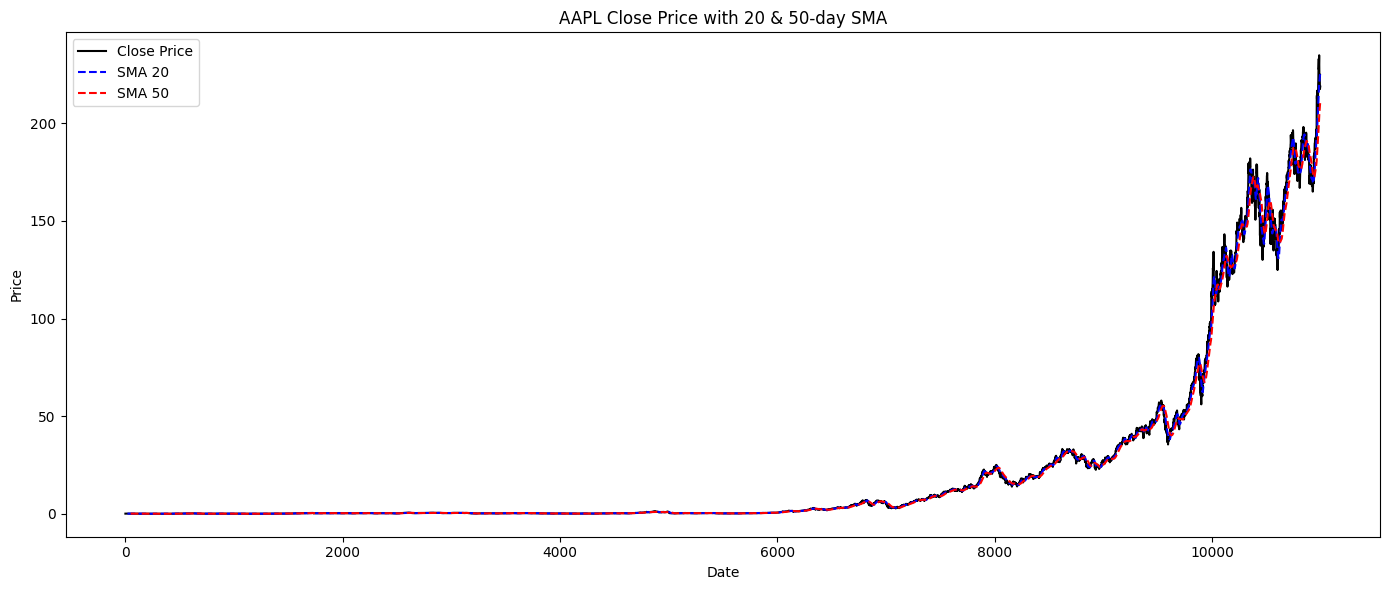

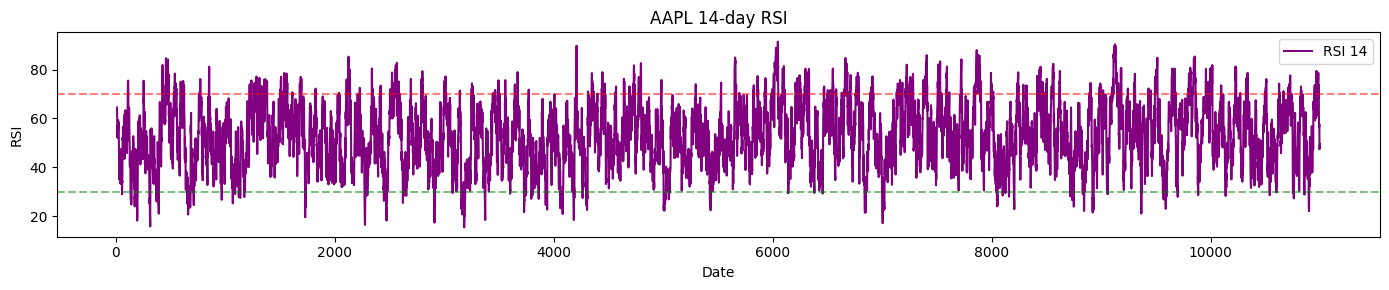

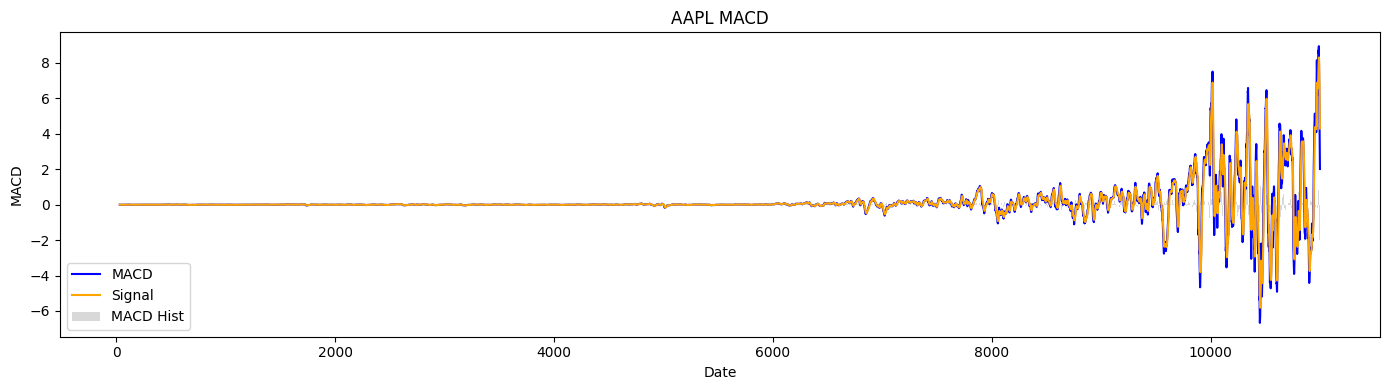

In [4]:
import matplotlib.pyplot as plt

# Plot Close price with SMA overlays
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df['SMA_50'], label='SMA 50', color='red', linestyle='--')
plt.title('AAPL Close Price with 20 & 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('AAPL 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()